### Welcome to the exercise about observational studies! This exercise will be hands on, and you will be able to practise the skills you developed so far!

## Propensity score matching

In this exercise, you will apply [propensity score matching](http://www.stewartschultz.com/statistics/books/Design%20of%20observational%20studies.pdf), which we discussed in lecture 6 ("Observational studies"), in order to draw conclusions from an observational study.

We will work with a by-now classic dataset from Robert LaLonde's study "[Evaluating the Econometric Evaluations of Training Programs](http://people.hbs.edu/nashraf/LaLonde_1986.pdf)" (1986).
The study investigated the effect of a job training program ("National Supported Work Demonstration") on the real earnings of an individual, a couple of years after completion of the program.
Your task is to determine the effectiveness of the "treatment" represented by the job training program.

#### Dataset description

- `treat`: 1 if the subject participated in the job training program, 0 otherwise
- `age`: the subject's age
- `educ`: years of education
- `race`: categorical variable with three possible values: Black, Hispanic, or White
- `married`: 1 if the subject was married at the time of the training program, 0 otherwise
- `nodegree`: 1 if the subject has earned no school degree, 0 otherwise
- `re74`: real earnings in 1974 (pre-treatment)
- `re75`: real earnings in 1975 (pre-treatment)
- `re78`: real earnings in 1978 (outcome)

If you want to deepen your knowledge on propensity scores and observational studies, we highly recommend Rosenbaum's excellent book on the ["Design of Observational Studies"](http://www.stewartschultz.com/statistics/books/Design%20of%20observational%20studies.pdf). Even just reading the first chapter (18 pages) will help you a lot.

In [27]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

data_folder = './data/'
df = pd.read_csv(data_folder + 'lalonde.csv')

In [2]:
df.sample(10)

,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
437,PSID253,0,21,9,1,0,0,1,1030.574,470.8548,1223.5580
524,PSID340,0,23,12,0,0,0,0,1504.717,0.0000,0.0000
156,NSW157,1,18,9,1,0,0,1,0.000,3287.3750,5010.3420
50,NSW51,1,28,8,1,0,0,1,0.000,0.0000,0.0000
426,PSID242,0,45,12,0,0,0,0,4473.006,608.7097,0.0000
283,PSID99,0,28,12,1,0,0,0,16722.340,4253.8060,7314.7470
289,PSID105,0,21,12,0,0,0,0,2827.222,4056.8710,5937.5050
202,PSID18,0,28,9,0,0,1,1,11091.410,10357.0200,15406.7800
364,PSID180,0,21,10,0,0,0,1,1767.259,1555.7900,7675.3120
119,NSW120,1,23,12,1,0,0,0,5506.308,501.0741,671.3318


## 1. A naive analysis

Compare the distribution of the outcome variable (`re78`) between the two groups, using plots and numbers.
To summarize and compare the distributions, you may use the techniques we discussed in lecture 4 ("Descibing data") and 3 ("Visualizing data").

What might a naive "researcher" conclude from this superficial analysis?

C:\Users\ravin\.conda\envs\ada\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ravin\.conda\envs\ada\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


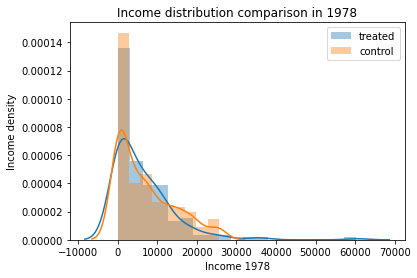

In [15]:
''' your code and explanations '''
ax = sns.distplot(treated['re78'], hist=True, label='treated');
ax = sns.distplot(control['re78'], hist=True, label='control')
ax.set(title='Income distribution comparison in 1978',xlabel='Income 1978', ylabel='Income density')
plt.legend()
plt.show()

In [16]:
treated = df.loc[df['treat'] == 1]
control = df.loc[df['treat'] == 0]

In [7]:
treated.re78.describe()

count      185.000000
mean      6349.143530
std       7867.402218
min          0.000000
25%        485.229800
50%       4232.309000
75%       9642.999000
max      60307.930000
Name: re78, dtype: float64

In [8]:
control.re78.describe()

count      429.000000
mean      6984.169742
std       7294.161791
min          0.000000
25%        220.181300
50%       4975.505000
75%      11688.820000
max      25564.670000
Name: re78, dtype: float64

1. Mean of control group is greater than treated group
2. Income for people in treated group is only higher in the 25 percentile of people than in control group

Looks like control group is better than treated group

## 2. A closer look at the data

You're not naive, of course (and even if you are, you've learned certain things in ADA), so you aren't content with a superficial analysis such as the above.
You're aware of the dangers of observational studies, so you take a closer look at the data before jumping to conclusions.

For each feature in the dataset, compare its distribution in the treated group with its distribution in the control group, using plots and numbers.
As above, you may use the techniques we discussed in class for summarizing and comparing the distributions.

What do you observe?
Describe what your observations mean for the conclusions drawn by the naive "researcher" from his superficial analysis.

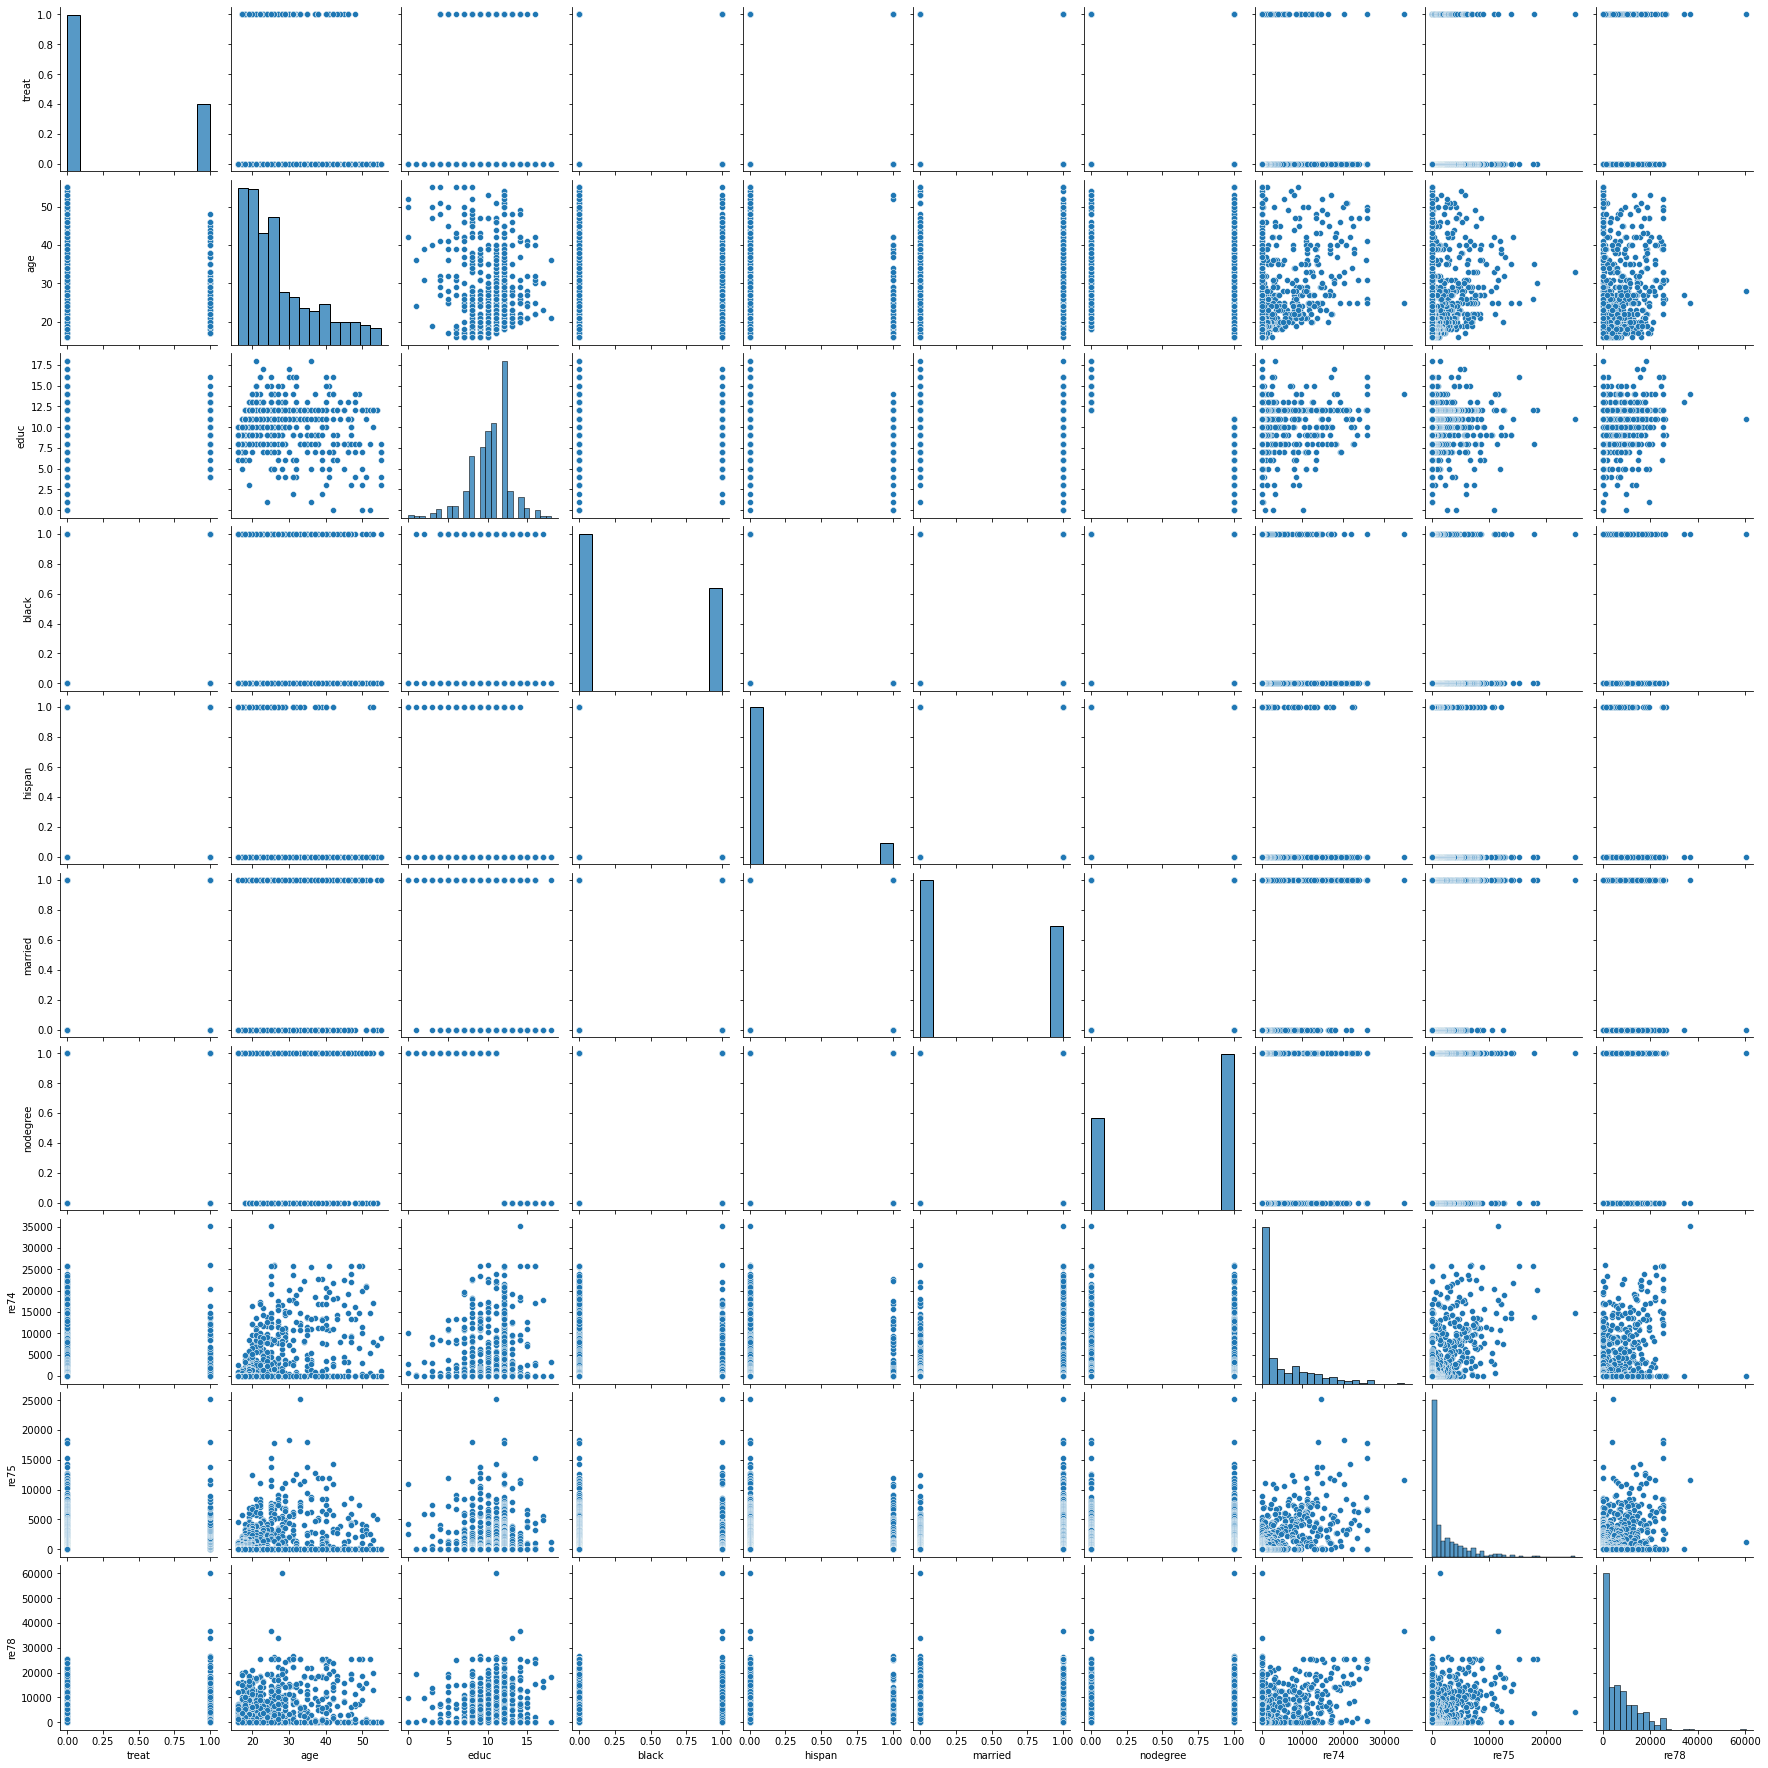

In [17]:
sns.pairplot(df)

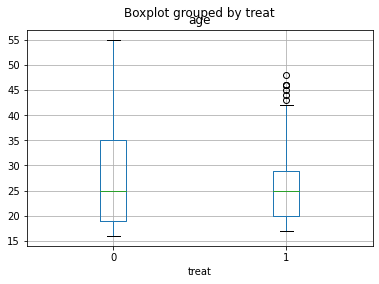

In [18]:
# Age

df.boxplot(by='treat', column='age', grid=True)
plt.show()

The age of people in control group is more than treated group

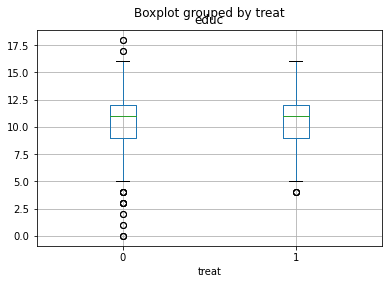

In [19]:
# Education

df.boxplot(by='treat', column='educ', grid=True)
plt.show()

C:\Users\ravin\.conda\envs\ada\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ravin\.conda\envs\ada\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


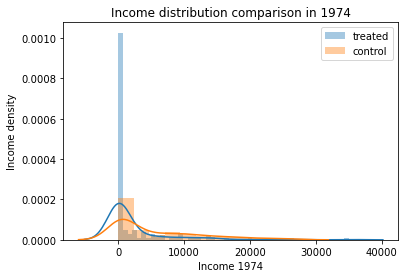

In [20]:
# income in 1974

ax = sns.distplot(treated['re74'], hist=True, label='treated');
ax = sns.distplot(control['re74'], hist=True, label='control')
ax.set(title='Income distribution comparison in 1974',xlabel='Income 1974', ylabel='Income density')
plt.legend()
plt.show()

The number of treated members that were unemployed before the training program is quite high. So this might give us an intuition of how much the program helped people to find a job, independently of the income that they got eventually. 

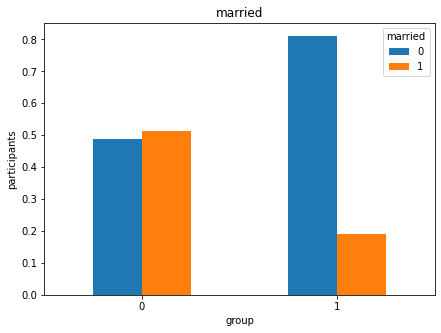

In [21]:
# marriage

group = df.groupby(['treat', 'married'])['married'].count()
group = group.unstack()
group = group.div(group.sum(axis=1), axis=0)
pl = group.plot(kind='bar', figsize=[7,5], rot=0)
pl.set_title('married')
pl.set_ylabel('participants')
pl.set_xlabel('group')
plt.show()

There are more unmarried people in treated group than and it is balanced in control group. Mostly single people are part of control group.

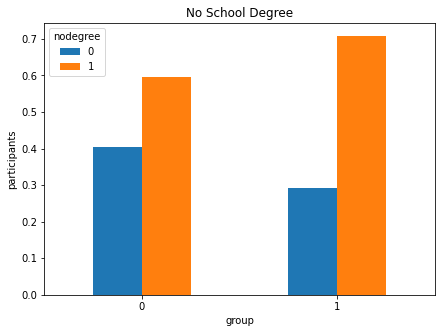

In [22]:
# degree

group = df.groupby(['treat', 'nodegree'])['nodegree'].count()
group = group.unstack()
group = group.div(group.sum(axis=1), axis=0)
pl = group.plot(kind='bar', figsize=[7,5], rot=0)
pl.set_title('No School Degree')
pl.set_ylabel('participants')
pl.set_xlabel('group')
plt.show()

Nearly 70% people in treated group and 60% people in control group do not have a school degree. May be this is not playing a important role.

<ipython-input-24-beb2b8d420e2>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_race = df.groupby(df.treat)['white', 'black', 'hispan'].sum()


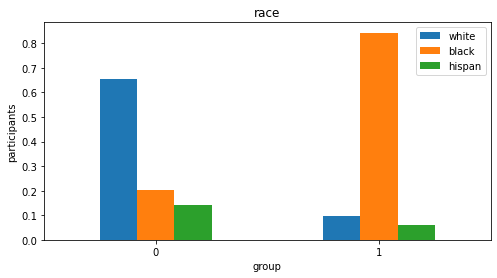

In [24]:
# race

df['white'] = (~(df['black'].astype(bool) | df['hispan'].astype(bool))).astype(bool)

df_race = df.groupby(df.treat)['white', 'black', 'hispan'].sum()
df_race = df_race.div(df_race.sum(axis=1), axis=0)
pl = df_race.plot(kind='bar', figsize=[8,4], rot=0)
pl.set_title('race')
pl.set_ylabel('participants')
pl.set_xlabel('group')
plt.show()

70% of those in control group are white where are nearly 85% of population in treated are black

## 3. A propensity score model

Use logistic regression to estimate propensity scores for all points in the dataset.
You may use `statsmodels` to fit the logistic regression model and apply it to each data point to obtain propensity scores.

Recall that the propensity score of a data point represents its probability of receiving the treatment, based on its pre-treatment features (in this case, age, education, pre-treatment income, etc.).
To brush up on propensity scores, you may read chapter 3.3 of the above-cited book by Rosenbaum or [this article](https://drive.google.com/file/d/0B4jctQY-uqhzTlpBaTBJRTJFVFE/view).

Note: you do not need a train/test split here. Train and apply the model on the entire dataset. If you're wondering why this is the right thing to do in this situation, recall that the propensity score model is not used in order to make predictions about unseen data. Its sole purpose is to balance the dataset across treatment groups.
(See p. 74 of Rosenbaum's book for an explanation why slight overfitting is even good for propensity scores.
If you want even more information, read [this article](https://drive.google.com/file/d/0B4jctQY-uqhzTlpBaTBJRTJFVFE/view).)

In [25]:
''' your code and explanations '''

df['age'] = (df['age'] - df['age'].mean())/df['age'].std()
df['educ'] = (df['educ'] - df['educ'].mean())/df['educ'].std()
df['re74'] = (df['re74'] - df['re74'].mean())/df['re74'].std()
df['re75'] = (df['re75'] - df['re75'].mean())/df['re75'].std()

In [28]:
mod = smf.logit(formula='treat ~  age + educ + C(black) + C(hispan)  + C(married) + C(nodegree) + re74 + re75', data=df)

res = mod.fit()

# Extract the estimated propensity scores
df['Propensity_score'] = res.predict()

print(res.summary())

Optimization terminated successfully.
         Current function value: 0.397267
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  treat   No. Observations:                  614
Model:                          Logit   Df Residuals:                      605
Method:                           MLE   Df Model:                            8
Date:                Fri, 30 Oct 2020   Pseudo R-squ.:                  0.3508
Time:                        08:18:47   Log-Likelihood:                -243.92
converged:                       True   LL-Null:                       -375.75
Covariance Type:            nonrobust   LLR p-value:                 2.194e-52
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -4.7286      1.017     -4.649      0.000      -6.722      -2.735
C(black)[T.

## 4. Balancing the dataset via matching

Use the propensity scores to match each data point from the treated group with exactly one data point from the control group, while ensuring that each data point from the control group is matched with at most one data point from the treated group.
(Hint: you may explore the `networkx` package in Python for predefined matching functions.)

Your matching should maximize the similarity between matched subjects, as captured by their propensity scores.
In other words, the sum (over all matched pairs) of absolute propensity-score differences between the two matched subjects should be minimized.

This is how networkx library can help you do this. Each possible pair of (treated_person, control_person) is characterized by a similarity. This is how we can initialize a graph, and add an edge for one possible pair. We then need to add an edge for each possible pair.
    - G = nx.Graph()
    - G.add_weighted_edges_from([(control_person, treated_person, similarity)])
Optimal matching is then found with:
    - matching = nx.max_weight_matching(G)

After matching, you have as many treated as you have control subjects.
Compare the outcomes (`re78`) between the two groups (treated and control).

Also, compare again the feature-value distributions between the two groups, as you've done in part 2 above, but now only for the matched subjects.
What do you observe?
Are you closer to being able to draw valid conclusions now than you were before?

In [29]:
''' your code and explanations ''';
def get_similarity(propensity_score1, propensity_score2):
    return 1-np.abs(propensity_score1-propensity_score2)

In [30]:
treatment_df = df[df['treat'] == 1]
control_df = df[df['treat'] == 0]

G = nx.Graph()

for control_id, control_row in control_df.iterrows():
    for treatment_id, treatment_row in treatment_df.iterrows():

        similarity = get_similarity(control_row['Propensity_score'],
                                    treatment_row['Propensity_score'])

        G.add_weighted_edges_from([(control_id, treatment_id, similarity)])

matching = nx.max_weight_matching(G)

In [34]:
matching = [x for t in matching for x in t]
matching = list(set(matching))

In [35]:
balanced_df = df.iloc[matching]

In [36]:
balanced_df

,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78,Propensity_score
0,NSW1,1,37,11,1,0,1,1,0.0,0.0,9930.0460,0.638770
1,NSW2,1,22,9,0,1,0,1,0.0,0.0,3595.8940,0.224634
2,NSW3,1,30,12,1,0,0,0,0.0,0.0,24909.4500,0.678244
3,NSW4,1,27,11,1,0,0,1,0.0,0.0,7506.1460,0.776324
4,NSW5,1,33,8,1,0,0,1,0.0,0.0,289.7899,0.701639
...,...,...,...,...,...,...,...,...,...,...,...,...
607,PSID423,0,27,10,1,0,0,1,0.0,0.0,7543.7940,0.747074
608,PSID424,0,25,14,0,0,0,0,0.0,0.0,0.0000,0.111459
609,PSID425,0,18,11,0,0,0,1,0.0,0.0,10150.5000,0.123144
611,PSID427,0,21,18,0,0,0,0,0.0,0.0,0.0000,0.183351


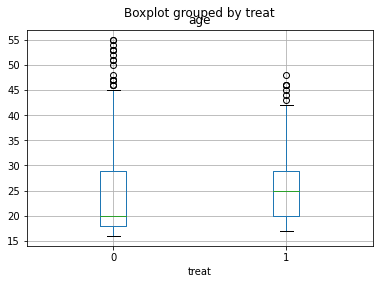

In [38]:
# Age

balanced_df.boxplot(by='treat', column='age', grid=True)
plt.show()

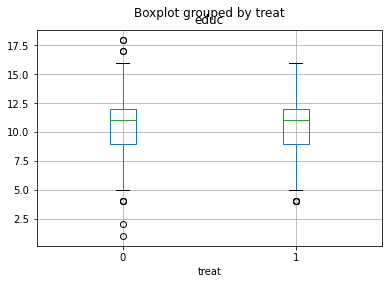

In [39]:
# Education

balanced_df.boxplot(by='treat', column='educ', grid=True)
plt.show()

C:\Users\ravin\.conda\envs\ada\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ravin\.conda\envs\ada\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


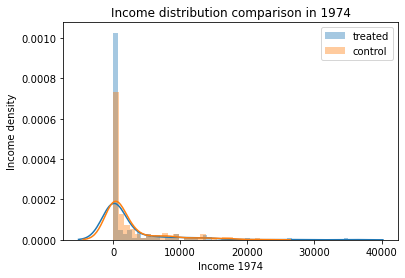

In [40]:
# income in 1974

treated = balanced_df.loc[balanced_df['treat'] == 1] #People that attained the programme
control = balanced_df.loc[balanced_df['treat'] == 0] #People that didn't attain the programme

ax = sns.distplot(treated['re74'], hist=True, label='treated');
ax = sns.distplot(control['re74'], hist=True, label='control')
ax.set(title='Income distribution comparison in 1974',xlabel='Income 1974', ylabel='Income density')
plt.legend()
plt.show()

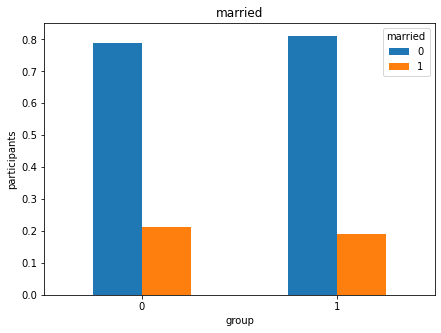

In [41]:
# marriage

group = balanced_df.groupby(['treat', 'married'])['married'].count()
group = group.unstack()
group = group.div(group.sum(axis=1), axis=0)
pl = group.plot(kind='bar', figsize=[7,5], rot=0)
pl.set_title('married')
pl.set_ylabel('participants')
pl.set_xlabel('group')
plt.show()

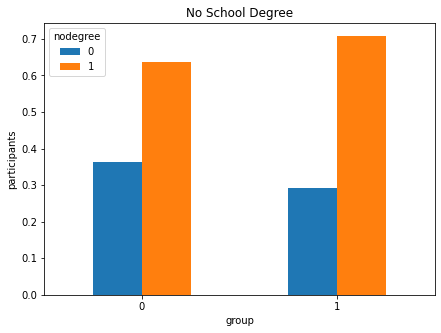

In [42]:
# degree

group = balanced_df.groupby(['treat', 'nodegree'])['nodegree'].count()
group = group.unstack()
group = group.div(group.sum(axis=1), axis=0)
pl = group.plot(kind='bar', figsize=[7,5], rot=0)
pl.set_title('No School Degree')
pl.set_ylabel('participants')
pl.set_xlabel('group')
plt.show()

<ipython-input-43-59c5753a8100>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  balanced_df['white'] = (~(balanced_df['black'].astype(bool) | df['hispan'].astype(bool))).astype(bool)
<ipython-input-43-59c5753a8100>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_race = balanced_df.groupby(balanced_df.treat)['white', 'black', 'hispan'].sum()


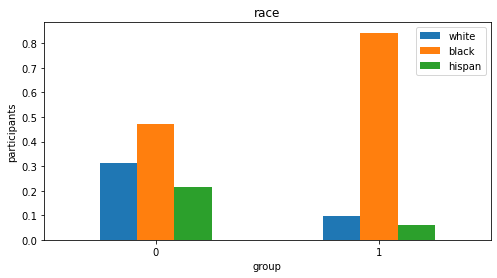

In [43]:
# race

balanced_df['white'] = (~(balanced_df['black'].astype(bool) | df['hispan'].astype(bool))).astype(bool)

df_race = balanced_df.groupby(balanced_df.treat)['white', 'black', 'hispan'].sum()
df_race = df_race.div(df_race.sum(axis=1), axis=0)
pl = df_race.plot(kind='bar', figsize=[8,4], rot=0)
pl.set_title('race')
pl.set_ylabel('participants')
pl.set_xlabel('group')
plt.show()

## 5. Balancing the groups further

Based on your comparison of feature-value distributions from part 4, are you fully satisfied with your matching?
Would you say your dataset is sufficiently balanced?
If not, in what ways could the "balanced" dataset you have obtained still not allow you to draw valid conclusions?

Improve your matching by explicitly making sure that you match only subjects that have the same value for the problematic feature.
Argue with numbers and plots that the two groups (treated and control) are now better balanced than after part 4.


In [44]:
''' your code and explanations ''';

treatment_df = df[df['treat'] == 1]
control_df = df[df['treat'] == 0]


G = nx.Graph()

for control_id, control_row in control_df.iterrows():
    for treatment_id, treatment_row in treatment_df.iterrows():

        # Adds an edge only if the individuals have the same race
        if (control_row['black'] == treatment_row['black'])\
            and (control_row['hispan'] == treatment_row['hispan']):
            similarity = get_similarity(control_row['Propensity_score'],
                                        treatment_row['Propensity_score'])

            G.add_weighted_edges_from([(control_id, treatment_id, similarity)])

matching = nx.max_weight_matching(G)

In [45]:
matching = [x for t in matching for x in t]
matching = list(set(matching))

In [46]:
balanced_df = df.iloc[matching]

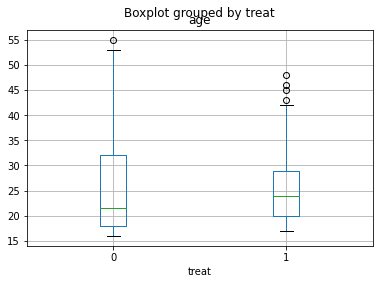

In [47]:
# Age

balanced_df.boxplot(by='treat', column='age', grid=True)
plt.show()

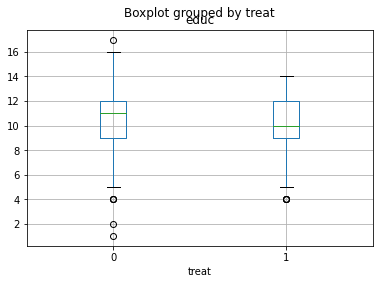

In [48]:
# Education

balanced_df.boxplot(by='treat', column='educ', grid=True)
plt.show()

C:\Users\ravin\.conda\envs\ada\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ravin\.conda\envs\ada\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


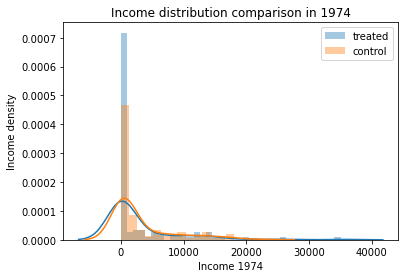

In [49]:
# income in 1974

treated = balanced_df.loc[balanced_df['treat'] == 1] #People that attained the programme
control = balanced_df.loc[balanced_df['treat'] == 0] #People that didn't attain the programme

ax = sns.distplot(treated['re74'], hist=True, label='treated');
ax = sns.distplot(control['re74'], hist=True, label='control')
ax.set(title='Income distribution comparison in 1974',xlabel='Income 1974', ylabel='Income density')
plt.legend()
plt.show()

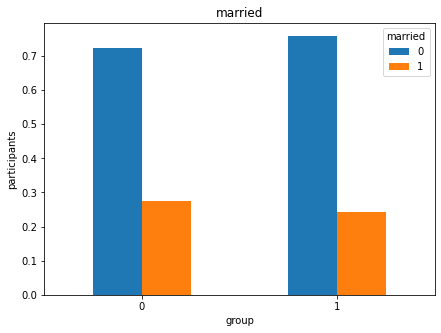

In [50]:
# marriage

group = balanced_df.groupby(['treat', 'married'])['married'].count()
group = group.unstack()
group = group.div(group.sum(axis=1), axis=0)
pl = group.plot(kind='bar', figsize=[7,5], rot=0)
pl.set_title('married')
pl.set_ylabel('participants')
pl.set_xlabel('group')
plt.show()

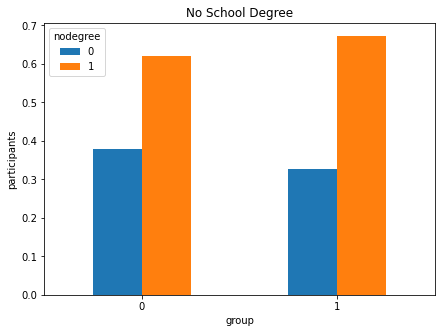

In [51]:
# degree

group = balanced_df.groupby(['treat', 'nodegree'])['nodegree'].count()
group = group.unstack()
group = group.div(group.sum(axis=1), axis=0)
pl = group.plot(kind='bar', figsize=[7,5], rot=0)
pl.set_title('No School Degree')
pl.set_ylabel('participants')
pl.set_xlabel('group')
plt.show()

<ipython-input-52-59c5753a8100>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  balanced_df['white'] = (~(balanced_df['black'].astype(bool) | df['hispan'].astype(bool))).astype(bool)
<ipython-input-52-59c5753a8100>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_race = balanced_df.groupby(balanced_df.treat)['white', 'black', 'hispan'].sum()


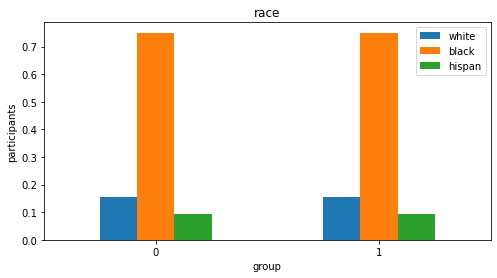

In [52]:
# race

balanced_df['white'] = (~(balanced_df['black'].astype(bool) | df['hispan'].astype(bool))).astype(bool)

df_race = balanced_df.groupby(balanced_df.treat)['white', 'black', 'hispan'].sum()
df_race = df_race.div(df_race.sum(axis=1), axis=0)
pl = df_race.plot(kind='bar', figsize=[8,4], rot=0)
pl.set_title('race')
pl.set_ylabel('participants')
pl.set_xlabel('group')
plt.show()

## 6. A less naive analysis

Compare the outcomes (`re78`) between treated and control subjects, as you've done in part 1, but now only for the matched dataset you've obtained from part 5.
What do you conclude about the effectiveness of the job training program?

In [55]:
''' your code and explanations '''

treated = balanced_df.loc[balanced_df['treat'] == 1] 
control = balanced_df.loc[balanced_df['treat'] == 0]

In [56]:
treated.re78.describe()

count      116.000000
mean      6375.738003
std       6670.986821
min          0.000000
25%        758.102600
50%       4648.736000
75%      10160.440000
max      36646.950000
Name: re78, dtype: float64

In [57]:
control.re78.describe()

count      116.000000
mean      5095.456025
std       6047.014862
min          0.000000
25%          0.000000
50%       2256.488500
75%       8942.092750
max      20243.380000
Name: re78, dtype: float64

C:\Users\ravin\.conda\envs\ada\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ravin\.conda\envs\ada\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


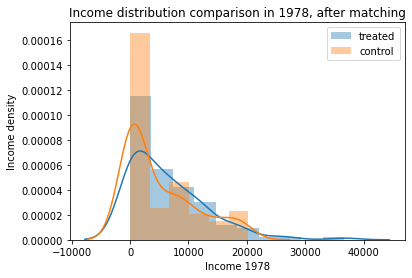

In [58]:
ax = sns.distplot(treated['re78'], hist=True, label='treated');
ax = sns.distplot(control['re78'], hist=True, label='control')
ax.set(title='Income distribution comparison in 1978, after matching',xlabel='Income 1978', ylabel='Income density')
plt.legend()
plt.show()

After propensity score matching, the positive effect of the training program can be seen